In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import json
%matplotlib inline

In [4]:

def plotVS(df1,df2,xlabel,ylabel):
    # Plot model vs model
    labels1 = df1[0].columns.values
    avarages1 = []
    errors1 = []
    c=['k','b','r','g']
    for label in labels1:
        average = np.mean([df[label] for df in df1], axis=0)
        avarages1.append(average)
        error = np.std([df[label] for df in df1], axis=0)
        errors1.append(error)
    labels2 = df2[0].columns.values
    avarages2 = []
    errors2 = []
    c=['k','b','r','g']
    for label in labels2:
        average = np.mean([df[label] for df in df2], axis=0)
        avarages2.append(average)
        error = np.std([df[label] for df in df2], axis=0)
        errors2.append(error)
    x = range(1, len(avarages1[0]) + 1)
    for i in range (len(avarages1)):
        plt.figure(figsize=(10, 6))
        plt.plot(x, avarages1[i], 'b-', label=xlabel)
        plt.plot(x, avarages2[i], 'r-', label=ylabel)
        plt.xlabel("Number of images")
        plt.ylabel("Seconds")
        plt.title("Browser VS Headless " + labels1[i] + " calculation times (S)")
        plt.legend()
        plt.grid(True)
        plt.show()
    
def plotDatasetTimes(df,xlabel,ylabel,title):
    
    labels = df[0].columns.values
    avarages = []
    errors = []
    c=['k','b','r','g']
    for label in labels:
        average = np.mean([df[label] for df in df], axis=0)
        avarages.append(average)
        error = np.std([df[label] for df in df], axis=0)
        errors.append(error)

    x = range(1, len(avarages[0]) + 1)
    # Plot all columns
    plt.figure(figsize=(10, 6))
    i = 0
    for column in df[0].columns:
        plt.errorbar(x, avarages[i], yerr=errors[i], fmt='o', capsize=5, mfc=c[i], mec=c[i], ecolor=c[i])
        # Connect the points with a line
        plt.plot(x, avarages[i], label=column, color=c[i])
        i += 1

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def getBrowserArrayTimes():
    browserTimesArray = []
    for i in range(1, 11):
        file_path = './data/resnet-wasm-browser (' + str(i) + ').json'
    
        with open(file_path) as file:
            data = json.load(file)
        
        RWB_Times = pd.DataFrame(data)
        RWB_Times_s = RWB_Times / 1000
        browserTimesArray.append(RWB_Times_s)
    
    return browserTimesArray

def getHeadlessArrayTimes():
    headlessTimesArray = []
    for i in range(1,11):
        file_path = './data/resnet-wasm-headless' + str(i) + '.json'
        with open(file_path) as file:
            data = json.load(file)
        RWB_Times = pd.DataFrame(data)
        RWB_Times_s = RWB_Times / 1000.0
        headlessTimesArray.append(RWB_Times_s)
    return headlessTimesArray

def getPythonArrayTimes():
    pythonTimesArray = []
    for i in range(1,11):
        file_path = './data/resnet-python' + str(i) + '.json'
        with open(file_path) as file:
            data = json.load(file)
        print(type(data))
        print(data)
        RWB_Times = pd.DataFrame(eval(data))
        RWB_Times_s = RWB_Times
        pythonTimesArray.append(RWB_Times_s)
    return pythonTimesArray

In [5]:
browserTimesArray = getBrowserArrayTimes()
headlessTimesArray = getHeadlessArrayTimes()
pythonTimesArray = getPythonArrayTimes()

<class 'str'>
[{"images": 0.0, "tensor": 7.260533332824707, "model": 1.9328045845031738, "total": 9.19333791732788}, {"images": 0.0, "tensor": 7.770079612731934, "model": 2.344036102294922, "total": 10.11511492729187}, {"images": 0.0010042190551757812, "tensor": 4.820091724395752, "model": 1.9653465747833252, "total": 6.786442518234253}, {"images": 0.0, "tensor": 3.323476552963257, "model": 1.8386437892913818, "total": 5.162120342254639}, {"images": 0.0, "tensor": 3.3580994606018066, "model": 3.538519859313965, "total": 6.89766526222229}, {"images": 0.0, "tensor": 3.7897286415100098, "model": 1.6622025966644287, "total": 5.4519312381744385}, {"images": 0.0, "tensor": 3.4410741329193115, "model": 1.7110376358032227, "total": 5.152111768722534}]
<class 'str'>
[{"images": 0.0, "tensor": 6.69250750541687, "model": 1.901979684829712, "total": 8.594487190246582}, {"images": 0.0, "tensor": 3.5151474475860596, "model": 2.00964617729187, "total": 5.52479362487793}, {"images": 0.0, "tensor": 3.3

In [6]:
pythonTimesArray

[     images    tensor     model      total
 0  0.000000  7.260533  1.932805   9.193338
 1  0.000000  7.770080  2.344036  10.115115
 2  0.001004  4.820092  1.965347   6.786443
 3  0.000000  3.323477  1.838644   5.162120
 4  0.000000  3.358099  3.538520   6.897665
 5  0.000000  3.789729  1.662203   5.451931
 6  0.000000  3.441074  1.711038   5.152112,
    images    tensor     model     total
 0     0.0  6.692508  1.901980  8.594487
 1     0.0  3.515147  2.009646  5.524794
 2     0.0  3.353685  1.716939  5.071666
 3     0.0  3.247278  1.660436  4.907714
 4     0.0  3.526576  1.644957  5.171533
 5     0.0  3.287352  1.929372  5.216724
 6     0.0  3.366894  1.632707  5.000600,
    images    tensor     model     total
 0     0.0  6.755355  1.724604  8.479959
 1     0.0  3.444111  1.775090  5.220210
 2     0.0  3.322502  1.660295  4.982797
 3     0.0  3.363182  1.595082  4.959265
 4     0.0  3.330287  1.666991  4.997277
 5     0.0  3.416606  1.843335  5.259941
 6     0.0  3.410358  1.762067 

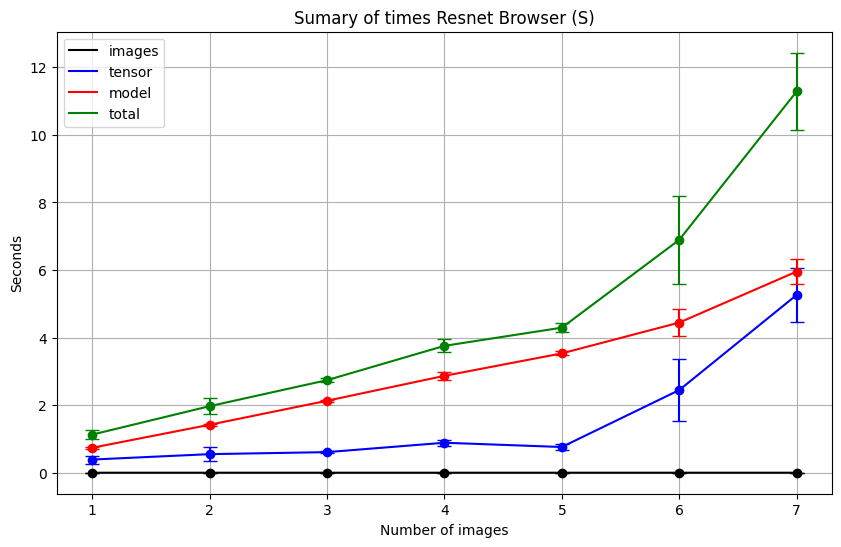

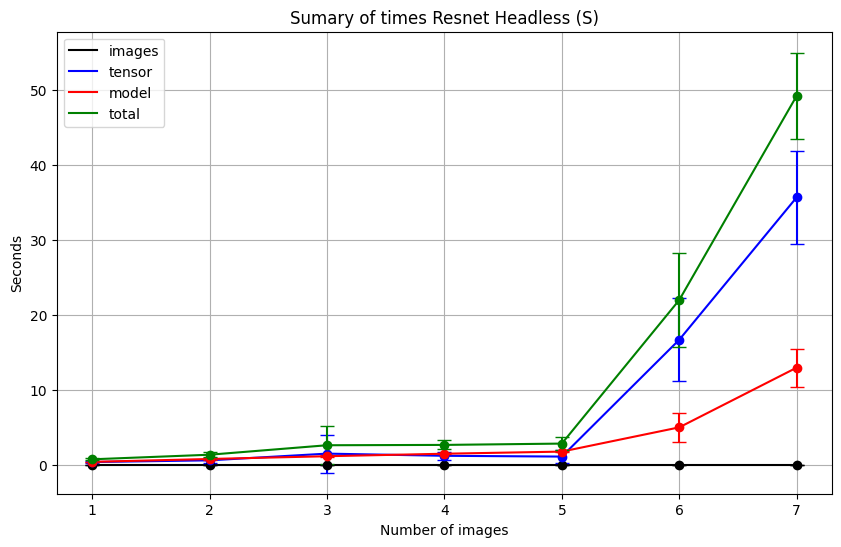

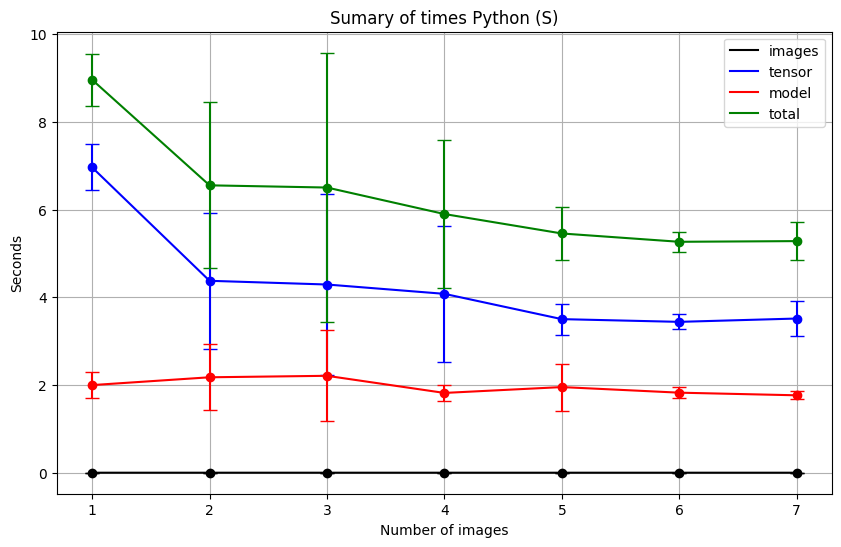

In [7]:
plotDatasetTimes(browserTimesArray,"Number of images", "Seconds", "Sumary of times Resnet Browser (S)")
plotDatasetTimes(headlessTimesArray,"Number of images", "Seconds", "Sumary of times Resnet Headless (S)")
plotDatasetTimes(pythonTimesArray,"Number of images", "Seconds", "Sumary of times Python (S)")

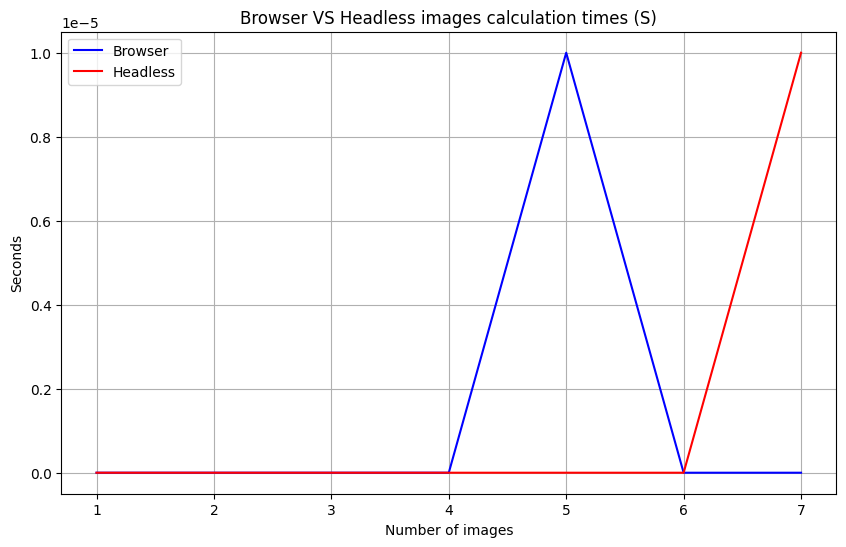

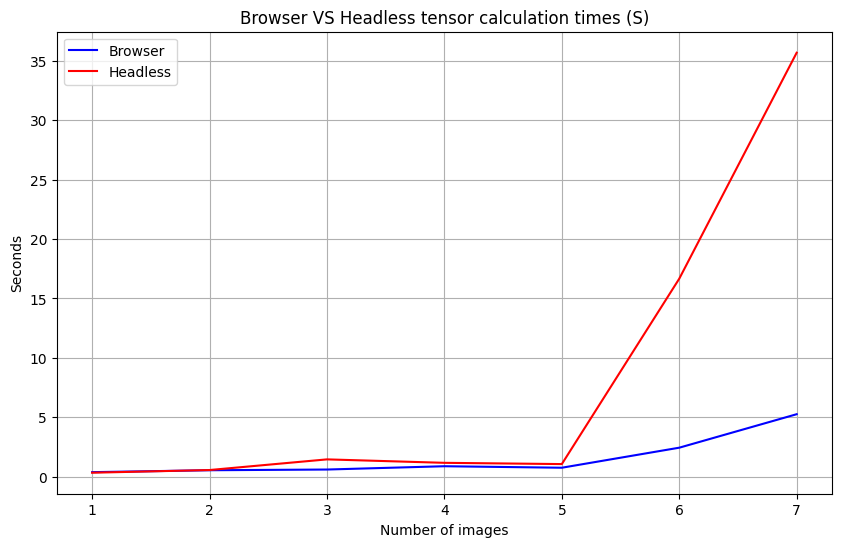

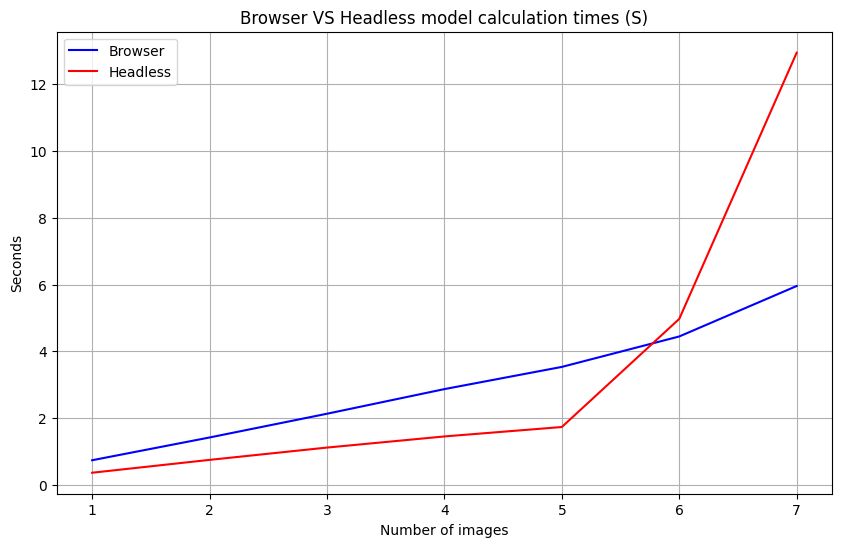

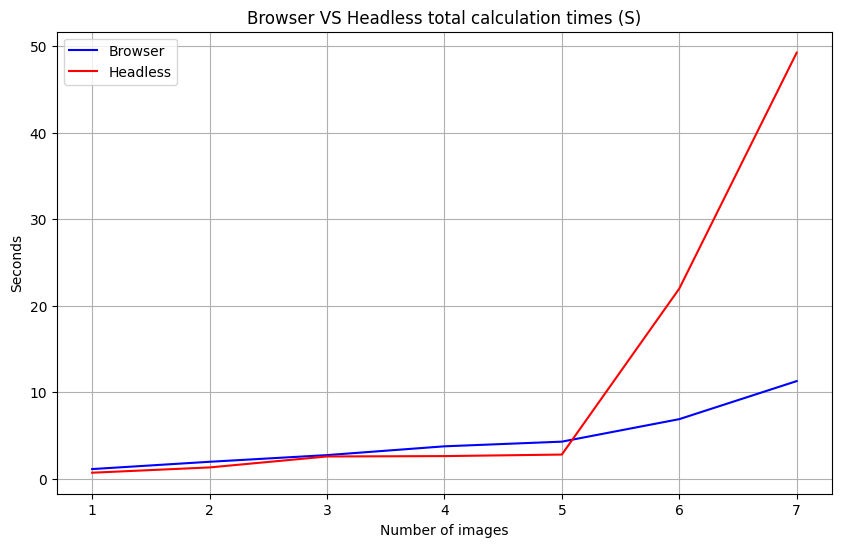

In [8]:
plotVS(browserTimesArray,headlessTimesArray,"Browser","Headless")

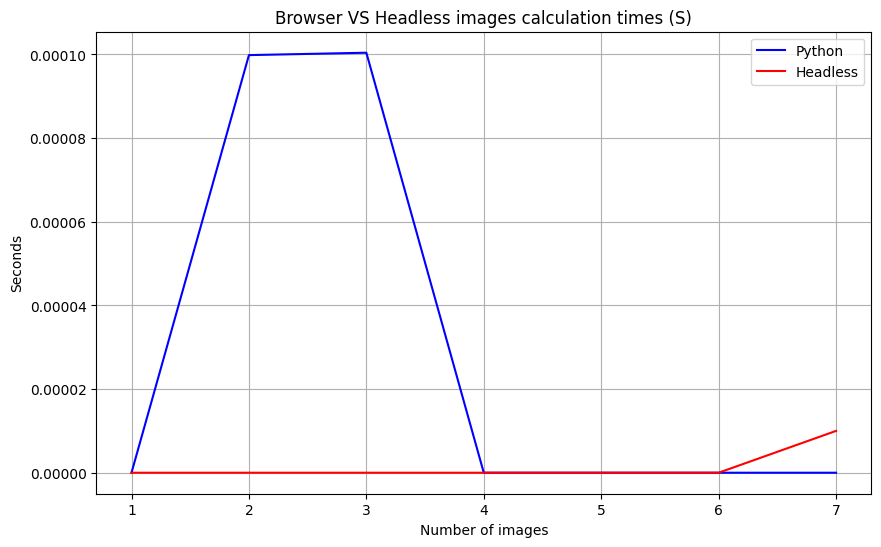

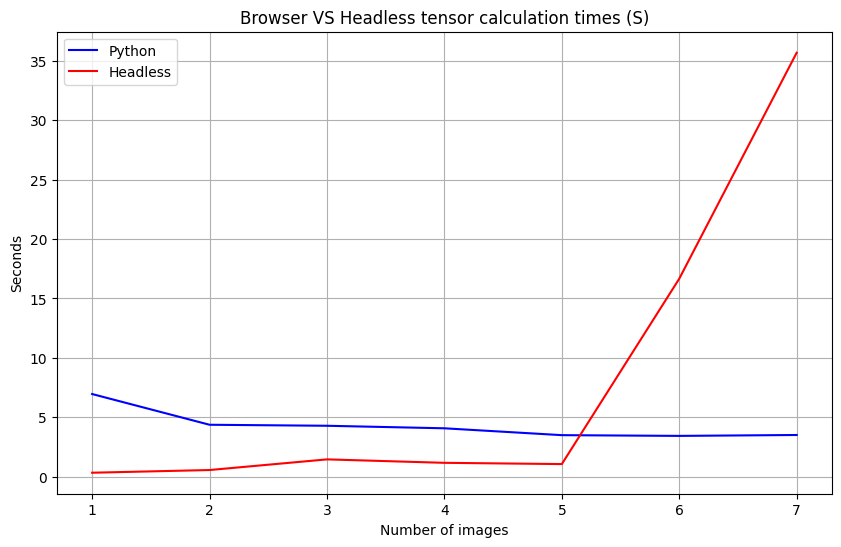

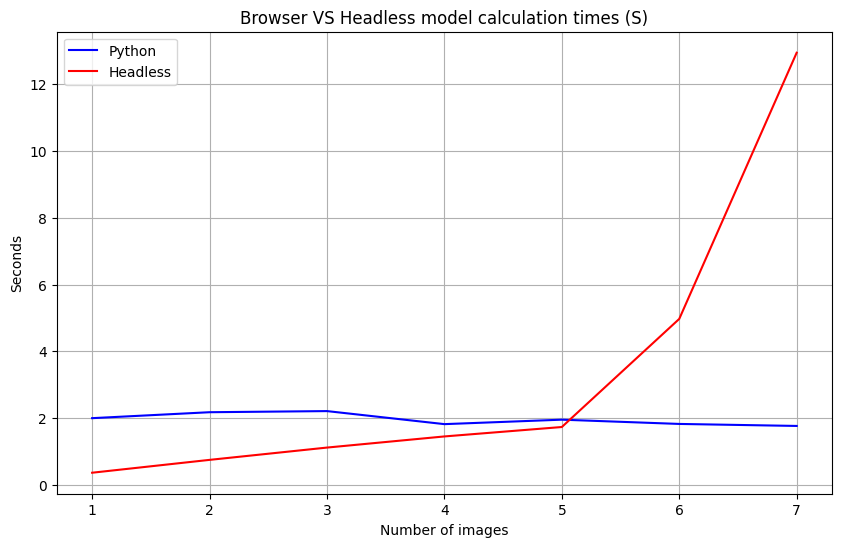

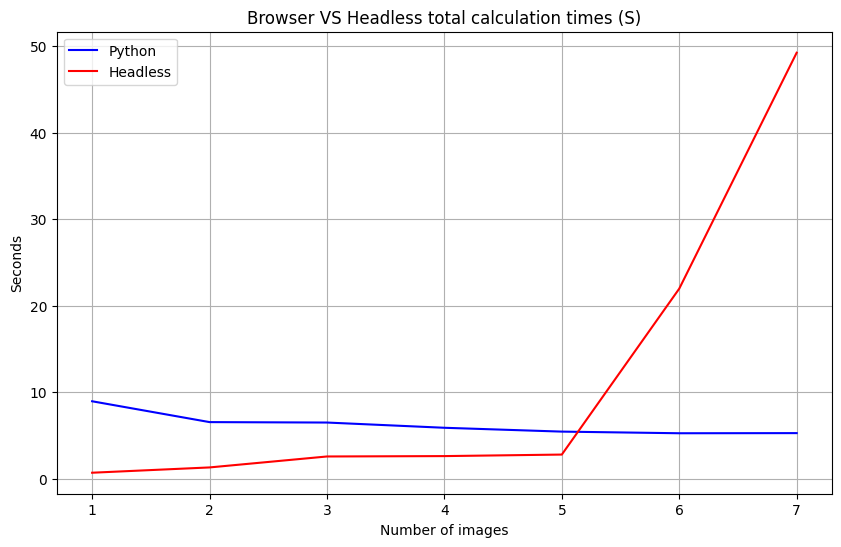

In [9]:
plotVS(pythonTimesArray,headlessTimesArray,"Python","Headless")